## Sumarização usando algoritmo de Luhn

 Algoritmo de Luhn para sumarização extrativa automática. Ele é uma técnica simples, mas poderosa, para identificar frases importantes com base na frequência das palavras. Apesar de suas limitações, o algoritmo serve como uma base sólida para entender métodos mais avançados.

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import string

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Pré processamento

In [5]:
texto = """A inteligência artificial (IA) está transformando diversos setores da sociedade, desde a saúde até o entretenimento. Na área médica, sistemas de IA auxiliam no diagnóstico de doenças e na personalização de tratamentos. No setor financeiro, algoritmos de aprendizado de máquina detectam fraudes e otimizam investimentos. Além disso, assistentes virtuais, como Alexa e Siri, utilizam IA para entender comandos humanos e fornecer respostas precisas. Apesar dos avanços, a IA também levanta preocupações éticas, como a privacidade de dados e o impacto no mercado de trabalho. Para garantir um futuro sustentável, é essencial que governos e empresas adotem regulamentações claras e responsáveis no uso da IA."""

# tokenização
frases = sent_tokenize(texto)

# remoção de stopwords/pontuação
stopwords_pt = set(stopwords.words('portuguese'))
palavras_limpo = [word for word in word_tokenize(texto.lower()) if word not in stopwords_pt and word not in string.punctuation]

print("Frases tokenizadas:")
for i, frase in enumerate(frases, 1):
    print(f"Frase {i}: {frase}")

print("\nPalavras limpas:")
print(palavras_limpo)

Frases tokenizadas:
Frase 1: A inteligência artificial (IA) está transformando diversos setores da sociedade, desde a saúde até o entretenimento.
Frase 2: Na área médica, sistemas de IA auxiliam no diagnóstico de doenças e na personalização de tratamentos.
Frase 3: No setor financeiro, algoritmos de aprendizado de máquina detectam fraudes e otimizam investimentos.
Frase 4: Além disso, assistentes virtuais, como Alexa e Siri, utilizam IA para entender comandos humanos e fornecer respostas precisas.
Frase 5: Apesar dos avanços, a IA também levanta preocupações éticas, como a privacidade de dados e o impacto no mercado de trabalho.
Frase 6: Para garantir um futuro sustentável, é essencial que governos e empresas adotem regulamentações claras e responsáveis no uso da IA.

Palavras limpas:
['inteligência', 'artificial', 'ia', 'transformando', 'diversos', 'setores', 'sociedade', 'desde', 'saúde', 'entretenimento', 'área', 'médica', 'sistemas', 'ia', 'auxiliam', 'diagnóstico', 'doenças', 'per

###Frênquencia e Geração do resumo

In [6]:
# frequência das palavras
frequencia_palavras = Counter(palavras_limpo)

# normalizar as frequências
max_frequencia = max(frequencia_palavras.values())
frequencia_normalizada = {palavra: freq / max_frequencia for palavra, freq in frequencia_palavras.items()}

print("\nFrequência Normalizada das Palavras:")
for palavra, freq in frequencia_normalizada.items():
    print(f"{palavra}: {freq:.4f}")


Frequência Normalizada das Palavras:
inteligência: 0.2000
artificial: 0.2000
ia: 1.0000
transformando: 0.2000
diversos: 0.2000
setores: 0.2000
sociedade: 0.2000
desde: 0.2000
saúde: 0.2000
entretenimento: 0.2000
área: 0.2000
médica: 0.2000
sistemas: 0.2000
auxiliam: 0.2000
diagnóstico: 0.2000
doenças: 0.2000
personalização: 0.2000
tratamentos: 0.2000
setor: 0.2000
financeiro: 0.2000
algoritmos: 0.2000
aprendizado: 0.2000
máquina: 0.2000
detectam: 0.2000
fraudes: 0.2000
otimizam: 0.2000
investimentos: 0.2000
além: 0.2000
disso: 0.2000
assistentes: 0.2000
virtuais: 0.2000
alexa: 0.2000
siri: 0.2000
utilizam: 0.2000
entender: 0.2000
comandos: 0.2000
humanos: 0.2000
fornecer: 0.2000
respostas: 0.2000
precisas: 0.2000
apesar: 0.2000
avanços: 0.2000
levanta: 0.2000
preocupações: 0.2000
éticas: 0.2000
privacidade: 0.2000
dados: 0.2000
impacto: 0.2000
mercado: 0.2000
trabalho: 0.2000
garantir: 0.2000
futuro: 0.2000
sustentável: 0.2000
essencial: 0.2000
governos: 0.2000
empresas: 0.2000
adotem

In [7]:
# função para calcular a pontuação de uma frase
def pontuar_frase(frase, frequencia_normalizada):
    palavras = word_tokenize(frase.lower())
    pontuacao = sum(frequencia_normalizada.get(palavra, 0) for palavra in palavras)
    return pontuacao / len(palavras) if palavras else 0

pontuacoes_frases = [(frase, pontuar_frase(frase, frequencia_normalizada)) for frase in frases]

# ordenar as frases por pontuação
pontuacoes_frases.sort(key=lambda x: x[1], reverse=True)

print("\nPontuações das Frases:")
for frase, pontuacao in pontuacoes_frases:
    print(f"Pontuação: {pontuacao:.4f} - Frase: {frase}")


Pontuações das Frases:
Pontuação: 0.1636 - Frase: Além disso, assistentes virtuais, como Alexa e Siri, utilizam IA para entender comandos humanos e fornecer respostas precisas.
Pontuação: 0.1455 - Frase: Para garantir um futuro sustentável, é essencial que governos e empresas adotem regulamentações claras e responsáveis no uso da IA.
Pontuação: 0.1444 - Frase: Na área médica, sistemas de IA auxiliam no diagnóstico de doenças e na personalização de tratamentos.
Pontuação: 0.1400 - Frase: A inteligência artificial (IA) está transformando diversos setores da sociedade, desde a saúde até o entretenimento.
Pontuação: 0.1250 - Frase: Apesar dos avanços, a IA também levanta preocupações éticas, como a privacidade de dados e o impacto no mercado de trabalho.
Pontuação: 0.1200 - Frase: No setor financeiro, algoritmos de aprendizado de máquina detectam fraudes e otimizam investimentos.


In [9]:
top_n = 1
resumo = " ".join([frase for frase, _ in pontuacoes_frases[:top_n]])

print("\nResumo Gerado:")
print(resumo)


Resumo Gerado:
Além disso, assistentes virtuais, como Alexa e Siri, utilizam IA para entender comandos humanos e fornecer respostas precisas.


###Visualização dos resultados


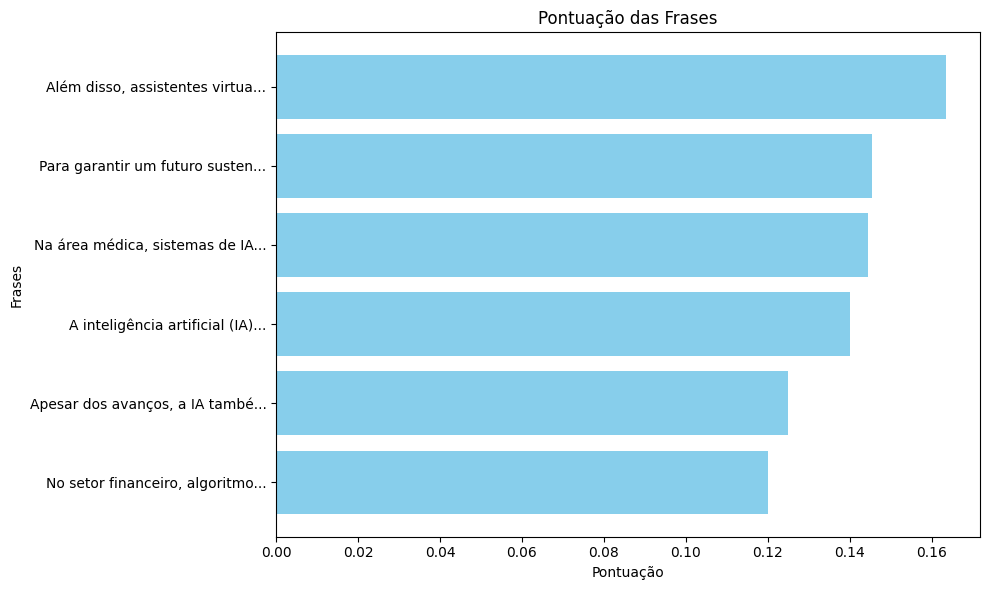

In [10]:
import matplotlib.pyplot as plt

frases_rotuladas = [frase[:30] + "..." for frase, _ in pontuacoes_frases]
pontuacoes = [pontuacao for _, pontuacao in pontuacoes_frases]

# plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(frases_rotuladas, pontuacoes, color='skyblue')
plt.title("Pontuação das Frases")
plt.xlabel("Pontuação")
plt.ylabel("Frases")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()